In [20]:
import sys
import cv2
import re
import csv

sys.path.append('..')

In [21]:
%matplotlib notebook
import math as m
import numpy as np
from scipy import ndimage
from scipy.optimize import lsq_linear

import matplotlib
import matplotlib.pyplot as plt

from matplotlib.widgets import RectangleSelector

from core import Core

from global_var import COLORS


In [22]:
matplotlib.rc('font', family='serif') 
matplotlib.rc('font', serif='Palatino Linotype') 
matplotlib.rc('text', usetex='false') 
matplotlib.rcParams.update({'font.size': 20})

In [23]:
def handle_choose_area(axes, shift, eclick, erelease):
    data[eclick.xdata:erelease.xdata, eclick.ydata:erelease.ydata] = 0
    axes.imshow(
    data,
    cmap='gray',
    zorder=0,
    vmin=np.min(d)*0.2,
    vmax=np.max(d)*0.2
)
    print('ej')
    print(eclick)
    print(erelease)

<IPython.core.display.Javascript object>


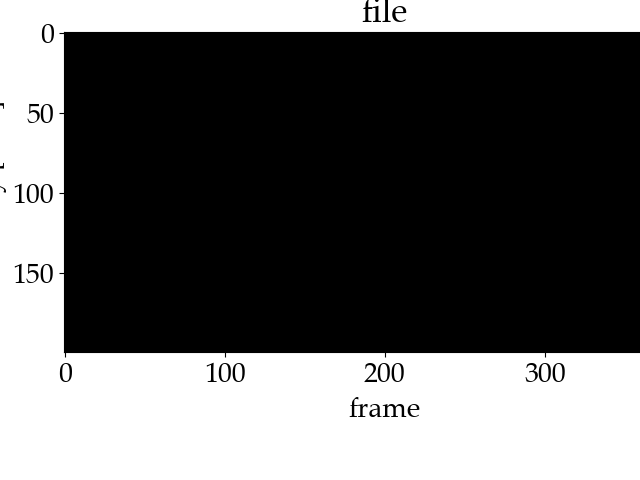

In [27]:
data = np.zeros((200, 400))

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 1, 1])
axes.set_title('file')
axes.set_xlabel('frame')
axes.set_ylabel('intensity [a. u.]')

axes.imshow(
    data,
    cmap='gray',
    zorder=0,
    vmin=np.min(d)*0.2,
    vmax=np.max(d)*0.2
)

def toggle_selector(event):
    pass

toggle_selector.RS = RectangleSelector(
            axes,
            lambda eclick, erelease: self.handle_choose_area(
                axes,
                (ylim[1], xlim[0]),
                eclick,
                erelease
            ),
            drawtype='box', useblit=True,
            button=[1, 3],  # don't use middle button
            minspanx=5,
            minspany=5,
            spancoords='pixels',
            interactive=True
        )

plt.connect('key_press_event', toggle_selector)

plt.show()

<IPython.core.display.Javascript object>


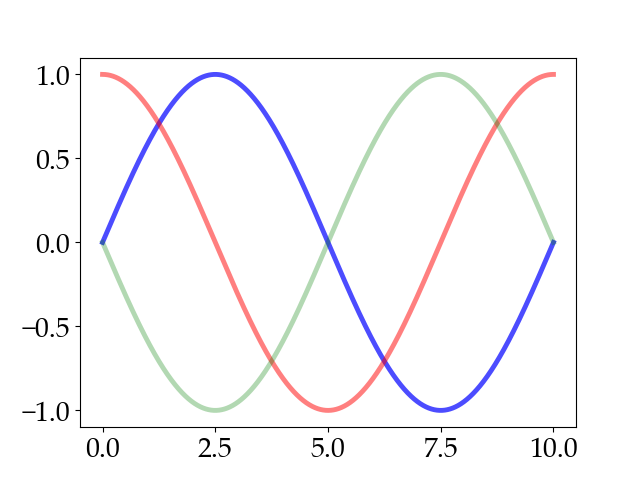


      click  -->  release


In [28]:
from matplotlib.widgets import RectangleSelector
import numpy as np
import matplotlib.pyplot as plt


def line_select_callback(eclick, erelease):
    'eclick and erelease are the press and release events'
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print("(%3.2f, %3.2f) --> (%3.2f, %3.2f)" % (x1, y1, x2, y2))
    print(" The button you used were: %s %s" % (eclick.button, erelease.button))


def toggle_selector(event):
    print(' Key pressed.')
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        print(' RectangleSelector deactivated.')
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        print(' RectangleSelector activated.')
        toggle_selector.RS.set_active(True)


fig, current_ax = plt.subplots()                 # make a new plotting range
N = 100000                                       # If N is large one can see
x = np.linspace(0.0, 10.0, N)                    # improvement by use blitting!

plt.plot(x, +np.sin(.2*np.pi*x), lw=3.5, c='b', alpha=.7)  # plot something
plt.plot(x, +np.cos(.2*np.pi*x), lw=3.5, c='r', alpha=.5)
plt.plot(x, -np.sin(.2*np.pi*x), lw=3.5, c='g', alpha=.3)

print("\n      click  -->  release")

# drawtype is 'box' or 'line' or 'none'
toggle_selector.RS = RectangleSelector(current_ax, line_select_callback,
                                       drawtype='box', useblit=True,
                                       button=[1, 3],  # don't use middle button
                                       minspanx=5, minspany=5,
                                       spancoords='pixels',
                                       interactive=True)
plt.connect('key_press_event', toggle_selector)
plt.show()